# <b>Feedforward Neural Network (FNN)</b>
Use Case: General-purpose tasks with structured or tabular data (e.g., predicting customer churn, credit scoring).

Why Used: Simple and effective for problems where relationships between features are straightforward.
- The key hints that the model is an FNN are:

    - Data flows linearly forward without loops or feedback.

    - The use of Dense layers and a Flatten layer to process inputs.

    - A simple architecture that maps inputs directly to outputs.

***
- <b>Setup tensorflow and load dataset</b>

    - Importing the MNIST dataset

        - Import the MNIST dataset that consists of 70,0000 grayscale images of handwritten digits (0-9) 
        
        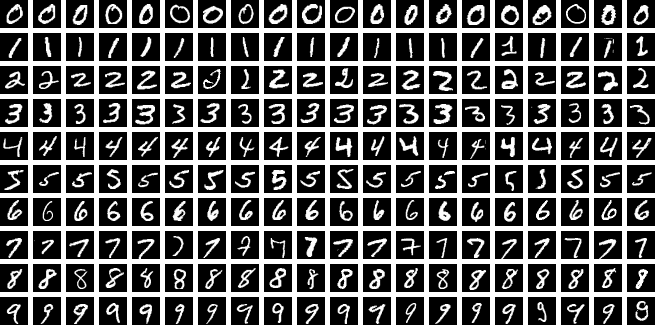

    - Loading the Data

        - Splits the data into training (x_train) and testing (x_test) datasets

        - <b>x_train and x_test are arrays where each element is a 2D array (28x28) that represents a grayscale image of a handwritten digit.</b>
            - For example, <code>x_train[0]</code> is the 28x28 pixel array of the first training image.

        - y_train and y_test contain the corresponding labels (digits 0–9)
            - For example, if <code>y_train[0]</code> is 7, it means the image in <code>x_train[0]</code> represents the digit "7."

        - load.data() automatically downloads the dataset if it isn't already present locally.

    - Normalizing the image data
        - MNIST images have pixel values in the range of 0 to 255. Dividing by 255.0 scales these values to the range [0, 1].

        - Normalization ensures that the neural network processes inputs on a consistent scale, improving <b>model convergence</b> and <b>stability</b> during training
***
    

In [76]:
import tensorflow as tf
import numpy
#print("TensorFlow version:", tf.__version__)
#Load the data and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist
# x_train and x_test are 3D arrays, actually
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0

***
- <b>Sequential Model defining</b> i.e. <b>"To ready for the evaluation job, I must acquire these skills"</b>

    - Layer-by-Layer

        - <code>Flatten(input_shape=(28,28))</code>:
            - This layer reshapes the input data from a 2D array of shape (28, 28) (grayscale image) into a 1D array of size 28*28 = 784.
            - It prepares the data to be fed into the dense (fully connected) layers.
        -> <b>Prepares the data to be fed into the dense (fully connected) layers</b>
        
        - <code>Dense(128, activation='relu')</code>:
            - A fully connected layer with 128 layers.
            - The activation function ReLU (Rectified Linear Unit) introduces non-linearity and helps the model learn complex patterns.
        -> <b>Where most of the computational learning happens </b>
        
        - <code>Dropout(0.2)</code>:
            - 0.2 representing 20% dropout rate
        -> <b>Reduce overfitting by randomly setting a fraction of the input units to zero during training.</b>

        - <code>Dense(10)</code>:
            - Another fully connected layer, but this one has 10 neurons (one for each digit in the MNIST dataset: 0–9).
            - No activation function is specified here, which means it defaults to a linear activation. <b>This is common when the output will later go through a softmax function for classification.</b>
***

In [ ]:
#input_shape(row,column)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***
- <b>Logits extraction (the model returns a vector of logits or log-odds score) i.e. "With my acquired  skills, I am confident that they are..."</b>

    - <b>Note</b>: Logits are the raw, unprocessed outputs (scores) produced by the last layer of a neural network during a forward pass. They represent the model's predictions before applying any kind of activation function, such as softmax or sigmoid, to convert them into probabilities.
    - <b> What Logits Represent</b>:
        - <b>Score-like Values</b>: Each number in the logits represents the "score" or raw confidence that the model assigns to a particular class. These scores are not normalized and can be positive, negative, or zero.

        - <b>No Direct Interpretation</b>: The absolute magnitude of the numbers in logits doesn't have a clear meaning (e.g., a value of 10 doesn't mean "10 times more likely"), but the relative differences between the logits matter.

        - Examples:
            - <code>logits = [2.5, -1.2, 0.3, 5.0, 0.0, -2.3, 1.7, 3.2, -0.8, 0.5]</code>
        
        - Each number corresponds to a specific digit (0 through 9):
            - The value 5.0 (for class 3) is the highest, which suggests the model is most confident that the input image is the digit "3."
            - The value -2.3 (for class 5) is quite low, meaning the model is very unlikely to believe the input represents the digit "5."

    - <b>Why multiple values?</b>
        1. One Value Per Class: Each logit corresponds to one class (e.g., "digit 0," "digit 1," ..., "digit 9"). The model evaluates how strongly it believes the input corresponds to each class. (Moreover, 2.5 is confidence in '0', -1.2 is '1', etc...)

        2. Relative Scores: These logits are not probabilities; they are raw scores indicating the model's relative confidence for each class. The class with the highest logit is considered the model's most confident prediction.
    
     - <b>Note</b>:The logits are raw and <b>not probabilities</b>. They need to be processed through the softmax function to be converted into a probability distribution. <b>Softmax essentially:

        1. Exponentiates each logit.

        2. Normalizes them so that they sum to 1. For example, the highest logit (5.0 in the example) will translate to the highest probability after softmax.
        </b>

    - <b><u>Softmax examples</u></b>:
        - Before: <code> logits = [2.0,1.0,0.1]</code>

        - After: <code> probabilities = [0.659, 0.242, 0.099] </code>

        -> These probabilities sum to 1.0 and indicate that the model is about 65.9% confident in class "0," 24.2% in class "1," and 9.9% in class "2."

    - Code Analysis:
        - <code>x_train[:1]</code>: slices the training data, x_train, to select only the first sample (or image). It's equivalent of <code>x_train[0:1] </code> The shape of x_train[:1] will still be 3D (batch size of {1, 28, 28} image). <b>This is because machine learning models typically expect data in batches, even if the batch size is just 1.</b>

        - <code>model(x_train[:1])</code>: Passes the first sample (image) through the trained model. The model then will compute the forward pass and return logits 

        - <code>.numpy()</code>: Converts the TensorFlow tensor returned by model(x_train[:1]) into a NumPy array.
        -> useful for further processing or analyzing the output outside the TensorFlow framework.

    Note: <code>x_train[:1]</code> contain the batch size but <code>x_train[0]</code> does not is because how slicing<code>([:1])</code> versus indexing <code>([0])</code> affects the structure of the array or tensor.

    - Indexing
        - This directly accesses the first element of  <code>x_train</code>.

        - The result is just the data for that single element, with the batch dimension (first dimension) removed.

        - For example, if x_train has a shape of (60000, 28, 28):
            - x_train[0] will return the first image as a 2D array of shape (28, 28).

            - The batch dimension is no longer present—it has been "flattened out" because you're directly grabbing the data without any higher-level grouping.

        

    - Slicing
        - This slices the dataset to take the first element, but it keeps the batch dimension intact.

        - The output is still a subset of <code>x_train</code>, preserving the structure of the dataset as a batch (even though it's just a batch of size 1).

        - For example, if x_train has a shape of (60000, 28, 28):
            - x_train[:1] will return the first image, but as a 3D array with a shape of (1, 28, 28)
            
            - Here, 1 represents the batch size, meaning the batch contains only one image
***



In [78]:
predictions = model(x_train[:1]).numpy() #slices the first image from the training dataset x_train. It is passed as input to the model for prediction.
predictions #a 1D array (vector) of 10 logits, representing the model's raw confidence scores for each digit class.

array([[ 0.4184333 ,  0.5952716 , -0.29928195, -0.7884574 , -1.2669076 ,
         0.09297933, -0.10115331, -0.3193872 , -0.37314647, -0.4420506 ]],
      dtype=float32)

***
- Convert Logits to Probabilities (does change the values in <code>predictions</code>)
***

In [79]:
#See the next markdown cell for explaination why this statement is ommitted
#tf.nn.softmax(predictions).numpy()

***
- <b>Loss function defining</b> (measures how well the neural network's predictions match the actual target values. It is a crucial component in training neural networks, as it provides a quantifiable metric to guide the optimization process. ) i.e <b>"Hey , I checked your evaluation, you are right and wrong at..."</b>

    - Sparse Categorical Crossentropy (calculate how different the model's predictions (<code>predictions</code>) are from the true labels (<code>y_train[:1]</code>))
         $$Loss = -log(P(y_{true}|logits))$$

        - Where:
            - y_true: The true class label (i.e. the correct value).<b>If you have an image of the digit "7," the true class label would be 7</b>
            - P(𝑦true∣logits): The predicted probability of the true class (obtained from the softmax of logits).
        - ![Screenshot 2025-03-19 at 00.09.27.png](<attachment:Screenshot 2025-03-19 at 00.09.27.png>)
    - This is a loss function commonly used in multi-class classification problems. It calculates the difference between the true labels <code>(y_train[:1])</code> and the model's predicted outputs (<code>predictions</code>).
    
    - The keyword <code>from_logits=True</code> indicates that the model's predictions are raw logits and not probabilities. <b>This is important because the loss function will apply a softmax operation internally to convert logits into probabilities during computation.</b>
    
    - Inputs to the Loss Function:
        - <code>y_train[:1]</code>: The first label from the training dataset. It is a scalar or an integer representing the true class (e.g., 3, 7, etc.). -> we used this because we used the first image in x_train

        - <code>predictions</code>: The logits output by the model for the first training sample (x_train[:1]).
    
    - Calculate the Loss:
        - The function computes the cross-entropy loss. Cross-entropy measures how well the predicted distribution (logits converted into probabilities) matches the true label. Lower loss values indicate better predictions.

    - Convert to NumPy: 
        - <code>.numpy()</code> converts the resulting TensorFlow tensor into a NumPy scalar value for easier readability or further processing.
***

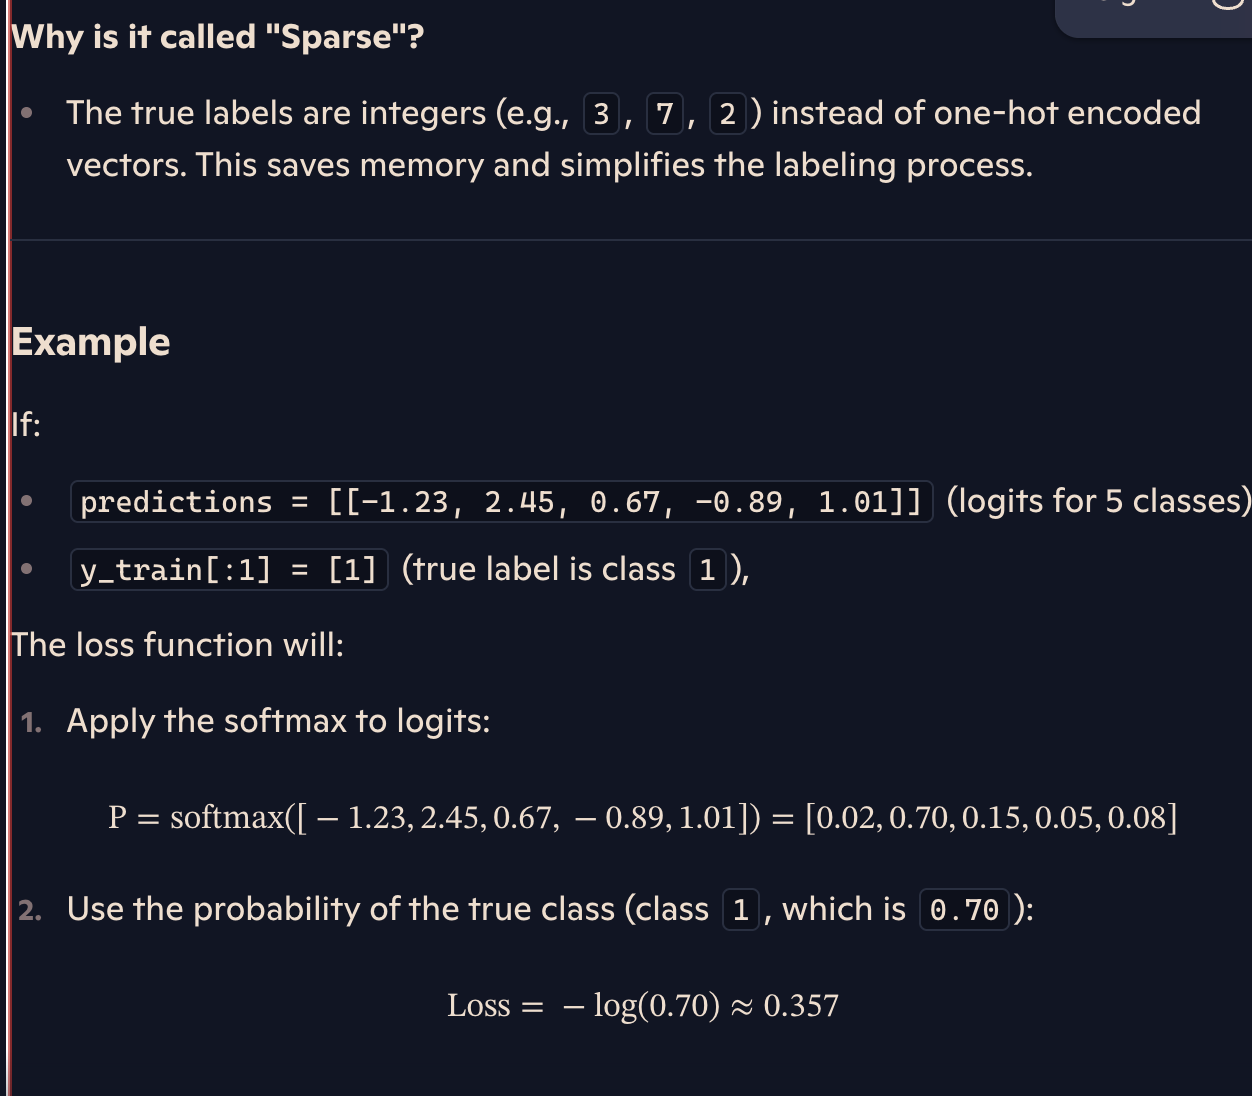

In [80]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1],predictions).numpy()

np.float32(2.089674)

***
- Model configuration for training
    - <code>optimizer='adam'</code>: An optimization algorithm that adjusts the weights of the model during training to minimize the loss function. It's widely used because it combines the advantages of two other optimization techniques: AdaGrad and RMSProp.

    - <code>loss=loss_fn</code>: Specifies the loss function used to evaluate how well the model is performing.

    - <code> metrics=['accuracy']</code>: Tell the model to compute and report the accuracy (the proportion of correct predictions) as a performance metric during training.

- Model training

    - <code>x_train</code>: The input training data. This is the feature data that the model will learn from.

    - <code>y_train</code>: The target training data (or labels). These are the corresponding labels that the model tries to predict.

    - <code>epochs=5</code>: The number of times the model will go through the entire training dataset during training. Each epoch represents one full cycle of forward and backward passes.
***

In [81]:
#Compile the model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

#Train the model
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8587 - loss: 0.4869
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9582 - loss: 0.1472
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9686 - loss: 0.1044
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9735 - loss: 0.0853
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - accuracy: 0.9778 - loss: 0.0704


In [82]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.9710 - loss: 0.0913

Test accuracy: 0.9750999808311462


In [83]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.13843876e-08, 8.74525607e-09, 1.25561257e-06, 7.38086874e-06,
        8.43563240e-12, 8.86718851e-07, 7.41657305e-15, 9.99990225e-01,
        1.28437261e-08, 9.06865552e-08],
       [5.08055500e-08, 1.18267026e-05, 9.99728501e-01, 2.02897383e-04,
        6.93999028e-16, 5.14861531e-05, 3.70459225e-06, 2.25457695e-12,
        1.53120357e-06, 6.95153050e-12],
       [2.96068424e-06, 9.98417139e-01, 6.53552357e-04, 1.01819205e-05,
        9.38431476e-05, 6.97162614e-06, 1.52858047e-05, 5.53146587e-04,
        2.11885592e-04, 3.49433394e-05],
       [9.99958217e-01, 3.79602083e-09, 6.24372115e-06, 2.38289260e-07,
        1.66749737e-06, 3.53716860e-06, 2.72940124e-05, 1.96267024e-06,
        1.12582361e-08, 7.75240153e-07],
       [4.89403021e-07, 9.19452702e-07, 6.98016447e-06, 4.86336489e-07,
        9.96107399e-01, 1.78762150e-06, 4.15225622e-06, 4.97846377e-05,
        4.42425602e-07, 3.82752041e-03]], dtype=float32)>